# Zillow Housing Index
## Objective
The goal of this assignment is to  to analyze the Zillow housing datatset and show how wealth is distributed in the U.S.
## Python libraries used
- Pandas
- Numpy
- Matplot
## Data Source
<a href="https://www.zillow.com/research/data/">Zillow Research Dataset</a>

In [3]:
from __future__ import division

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 7)

#### Reads csv and assigns to a data frame object

In [4]:
df = pd.read_csv('zillow_homes.csv') 

#### Returns the first 2 rows 

In [5]:
df.head(2)

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
0,2016-09-30,61639,10025,NY,New York,New York,New York,0,1004200,-0.009567,-0.040329,-0.087837,0.064578,0.029179,2016-03,2016-Q1,1103200,-0.089739,2015-06
1,2016-09-30,84654,60657,IL,Chicago,Cook,Chicago,1,318300,0.007916,0.023144,0.029098,0.037020,0.000094,2007-09,2007-Q3,324300,-0.018501,2006-12


#### Number of unique states

In [6]:
df.State.unique() 

array(['NY', 'IL', 'TX', 'CA', 'FL', 'TN', 'NC', 'GA', 'DC', 'MD', 'MO',
       'AZ', 'VA', 'NJ', 'OH', 'PA', 'MI', 'KS', 'NM', 'WA', 'CT', 'NV',
       'MA', 'CO', 'IN', 'OR', 'SC', 'OK', 'ND', 'AR', 'AL', 'DE', 'LA',
       'MS', 'MT', 'KY', 'WI', 'HI', 'UT', 'MN', 'ID', 'RI', 'NE', 'WY',
       'AK', 'IA', 'NH', 'VT', 'WV', 'SD', 'ME'], dtype=object)

In [7]:
len(df.State.unique()) 

51

####  Number of zipcodes in each state

In [8]:
df.groupby('State').size().sort_values(ascending=False)[:5] 

State
CA    1208
NY     962
FL     815
PA     771
TX     598
dtype: int64

In [9]:
df.State.value_counts()[:5] 

CA    1208
NY     962
FL     815
PA     771
TX     598
Name: State, dtype: int64

#### Histogram of number of counties in each price bucket

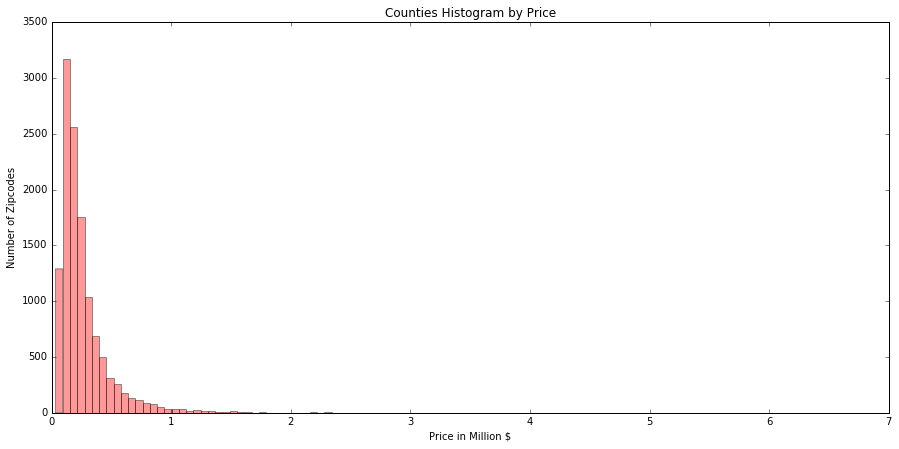

In [10]:
plt.title('Counties Histogram by Price')
plt.xlabel('Price in Million $')
plt.ylabel('Number of Zipcodes')
plt.hist(df.Zhvi / 10 ** 6, bins=100, alpha=0.4, color='red');


#### Normalized histogram

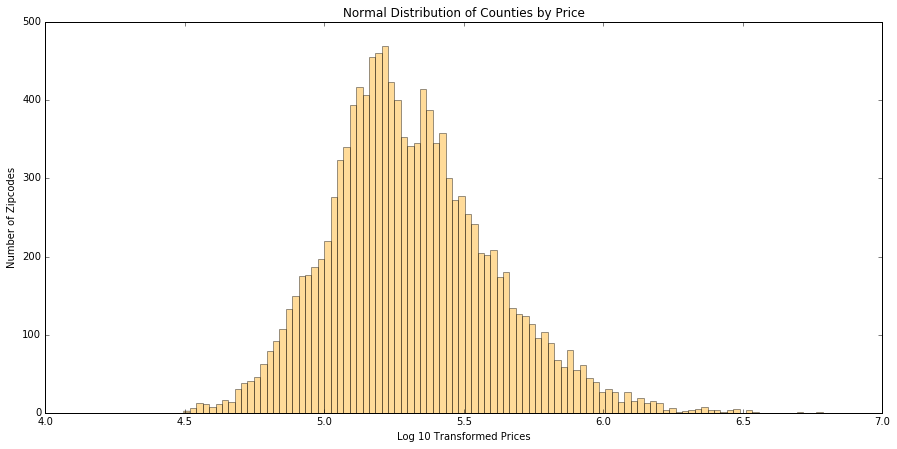

In [11]:
plt.title('Normal Distribution of Counties by Price')
plt.xlabel('Log 10 Transformed Prices')
plt.ylabel('Number of Zipcodes')
plt.hist(np.log10(df.Zhvi), bins=100, alpha=0.4, color='orange'); # By taking log of prices makes the plot less skewed

#### Empirical Cumulative Distribution

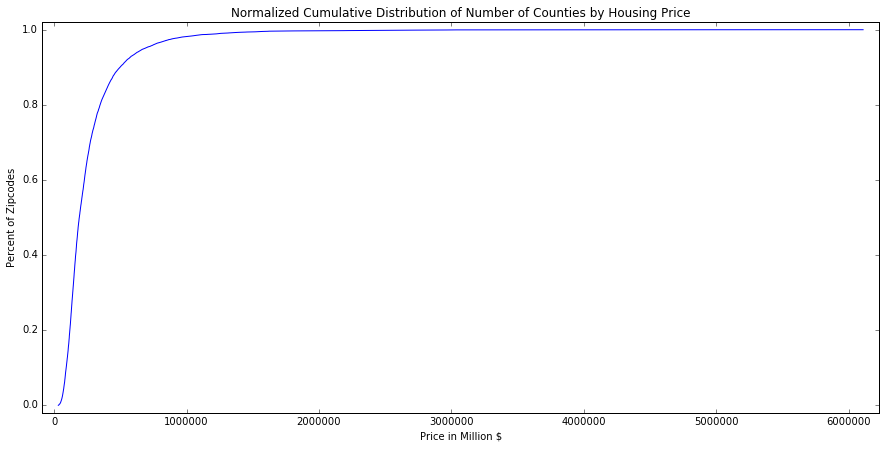

In [12]:
x = df.Zhvi.sort_values()
y = np.arange(1, len(df) + 1) / len(df)
plt.margins(0.02)
plt.title('Normalized Cumulative Distribution of Number of Counties by Housing Price')
plt.xlabel('Price in Million $')
plt.ylabel('Percent of Zipcodes')
plt.plot(x, y, color='blue'); # summation of the bars

#### Boxplot of counties by housing prices

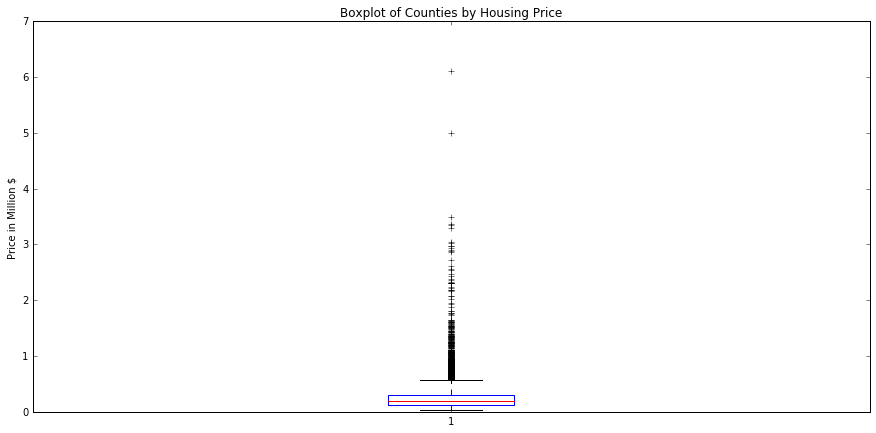

In [13]:
plt.title('Boxplot of Counties by Housing Price')
plt.ylabel('Price in Million $')
plt.boxplot(df.Zhvi.values / 10 ** 6);

#### Descriptive statistics 

In [14]:
df.Zhvi.describe()

count    1.248100e+04
mean     2.629272e+05
std      2.533642e+05
min      3.130000e+04
25%      1.296000e+05
50%      1.897000e+05
75%      3.061000e+05
max      6.108000e+06
Name: Zhvi, dtype: float64

####  0.3% of zipcodes in the U.S. have median house price of 2 million 

In [25]:
round(len(df[df.Zhvi > 10 ** 6 * 2]) / len(df), 3) * 100 

0.3

#### Fastest appreciation cities

In [26]:
df.sort_values('YoY', ascending=False)[:5]

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
6019,2016-09-30,75847,40965,KY,Middlesborough,Bell,Middlesborough,6019,87500,0.022196,0.136364,0.488095,0.021685,NaN,2016-09,2016-Q3,87500,0.000000,2016-09
9535,2016-09-30,71412,31063,GA,NaN,Macon,Montezuma,9535,72300,0.009777,0.055474,0.446000,0.082681,0.004974,2009-12,2009-Q4,74700,-0.032129,2009-09
7204,2016-09-30,68084,24293,VA,Big Stone Gap,Wise,Wise,7204,142400,0.013523,0.031884,0.445685,0.075412,0.045337,2016-09,2016-Q3,142400,0.000000,2016-09
2615,2016-09-30,96969,92651,CA,Los Angeles-Long Beach-Anaheim,Orange,Laguna Beach,2615,2170200,0.034364,0.120450,0.419173,0.085042,0.035790,2016-09,2016-Q3,2170200,0.000000,2016-09
9251,2016-09-30,71606,31634,GA,NaN,Clinch,Homerville,9251,86700,0.017606,0.082397,0.418985,0.063594,0.045429,2016-09,2016-Q3,86700,0.000000,2016-09


#### Slowest appreciation cities

In [27]:
df.sort_values('YoY')[:5]

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
10028,2016-09-30,84790,61054,IL,Rochelle,Ogle,Mount Morris,10028,34800,-0.027933,-0.079365,-0.325581,-0.165907,NaN,2009-08,2009-Q3,103400,-0.663443,NaN
9512,2016-09-30,76510,43080,OH,Columbus,Licking,Utica,9512,128800,-0.025719,-0.087819,-0.293085,0.046127,0.020835,2015-08,2015-Q3,184000,-0.300000,2014-01
8414,2016-09-30,84756,61010,IL,Rochelle,Ogle,Byron,8414,76500,-0.009067,-0.032870,-0.284378,-0.129336,NaN,2009-08,2009-Q3,168700,-0.546532,NaN
11128,2016-09-30,84765,61020,IL,Rochelle,Ogle,Davis Junction,11128,66900,-0.001493,0.009050,-0.278317,-0.129580,NaN,2009-08,2009-Q3,155000,-0.568387,NaN
10932,2016-09-30,84813,61084,IL,Rochelle,Ogle,Stillman Valley,10932,73800,-0.002703,-0.016000,-0.263473,-0.137256,NaN,2009-08,2009-Q3,163200,-0.547794,NaN


### Kutztown rank

In [28]:
df[df.City == 'Kutztown'] # median house price in Kutztown is $191,200

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
6951,2016-09-30,65988,19530,PA,Reading,Berks,Kutztown,6951,191200,0.001047,0.008971,0.03184,0.006941,-0.006556,2007-06,2007-Q2,215100,-0.111111,2005-12


In [29]:
kutztown_zhvi = df[df.City == 'Kutztown']['Zhvi'].values[0]
kutztown_zhvi

191200

In [61]:
sorted_desc_zhvi = sorted(list(df.Zhvi.values), reverse=True)
print 'Kutztown rank is', sorted_desc_zhvi.index(kutztown_zhvi), 'out of', len(df), 'zipcodes'
# we find the index of the rank of Kutztown in the Nation 

Kutztown rank is 6192 out of 12481 zipcodes


#### Most expensive zipcodes

In [62]:
df[df.Zhvi > 10 ** 6 * 3].sort_values('Zhvi', ascending=False) 
# Number of zipcodes with median house prices above $3 million 

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
9017,2016-09-30,97518,94027,CA,San Francisco,San Mateo,Atherton,9017,6108000,-0.002955,-0.013470,0.044674,0.137956,0.048933,2016-05,2016-Q2,6220800,-0.018133,2016-02
4312,2016-09-30,96086,90210,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,Beverly Hills,4312,5003200,-0.001457,-0.000779,0.055772,0.111951,0.049578,2016-07,2016-Q3,5020100,-0.003366,2016-06
9780,2016-09-30,62321,11976,NY,New York,Suffolk,Water Mill,9780,3497000,0.009352,0.051540,0.121624,0.059268,NaN,2016-09,2016-Q3,3497000,0.000000,2016-09
6639,2016-09-30,96149,90402,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,Santa Monica,6639,3371800,-0.000711,-0.002810,0.051584,0.092347,0.028321,2016-06,2016-Q2,3381300,-0.002810,2016-05
5158,2016-09-30,97691,94301,CA,San Jose,Santa Clara,Palo Alto,5158,3352400,-0.003004,0.008119,0.062702,0.145896,0.083520,2016-08,2016-Q3,3362500,-0.003004,2016-07
5374,2016-09-30,97513,94022,CA,San Jose,Santa Clara,Los Altos,5374,3298600,-0.007253,-0.018975,0.001579,0.128623,0.056553,2016-03,2016-Q1,3403300,-0.030764,2015-10
10229,2016-09-30,62281,11930,NY,New York,Suffolk,Amagansett,10229,3037300,0.015310,0.107291,0.078089,0.111135,NaN,2016-09,2016-Q3,3037300,0.000000,2016-09
8856,2016-09-30,97519,94028,CA,San Francisco,San Mateo,Portola Valley,8856,3028400,-0.001944,-0.004994,0.005412,0.097121,0.022587,2016-02,2016-Q1,3077100,-0.015827,2015-11


### Menlo Park Rank

In [63]:
df[df.RegionName == 94025]

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
1492,2016-09-30,97516,94025,CA,San Francisco,San Mateo,Menlo Park,1492,1943600,-0.008873,-0.029752,-0.003231,0.135656,0.058209,2016-05,2016-Q2,2010700,-0.033371,2016-01


In [64]:
len(df[df.State == 'CA']) # number of zipcodes in California

1208

In [65]:
ca = df[df.State == 'CA']

In [66]:
ca.sort_values('Zhvi', ascending=False)[:5]

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
9017,2016-09-30,97518,94027,CA,San Francisco,San Mateo,Atherton,9017,6108000,-0.002955,-0.013470,0.044674,0.137956,0.048933,2016-05,2016-Q2,6220800,-0.018133,2016-02
4312,2016-09-30,96086,90210,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,Beverly Hills,4312,5003200,-0.001457,-0.000779,0.055772,0.111951,0.049578,2016-07,2016-Q3,5020100,-0.003366,2016-06
6639,2016-09-30,96149,90402,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,Santa Monica,6639,3371800,-0.000711,-0.002810,0.051584,0.092347,0.028321,2016-06,2016-Q2,3381300,-0.002810,2016-05
5158,2016-09-30,97691,94301,CA,San Jose,Santa Clara,Palo Alto,5158,3352400,-0.003004,0.008119,0.062702,0.145896,0.083520,2016-08,2016-Q3,3362500,-0.003004,2016-07
5374,2016-09-30,97513,94022,CA,San Jose,Santa Clara,Los Altos,5374,3298600,-0.007253,-0.018975,0.001579,0.128623,0.056553,2016-03,2016-Q1,3403300,-0.030764,2015-10


#### Number of unique cities and zipcodes in the U.S. for this dataset

In [67]:
print 'Unique zipcodes:', len(df.RegionName.unique())
print 'Unique cities:', len(df.City.unique())

Unique zipcodes: 12481
Unique cities: 6559


#### Descriptive statistics for Oklahoma

In [39]:
ok = df[df.State == 'OK']
print 'Number of zipcodes in Oklahoma:', len(ok)

Number of zipcodes in Oklahoma: 68


In [40]:
ok_chart = ok.sort_values('Zhvi')[:10]
zipcodes = ok_chart.RegionName.values[:10]
print 'Zipcodes with lowest median housing price:', ', '.join(map(str, zipcodes))

Zipcodes with lowest median housing price: 73860, 74126, 74115, 73005, 74106, 74130, 74127, 74003, 74653, 73701


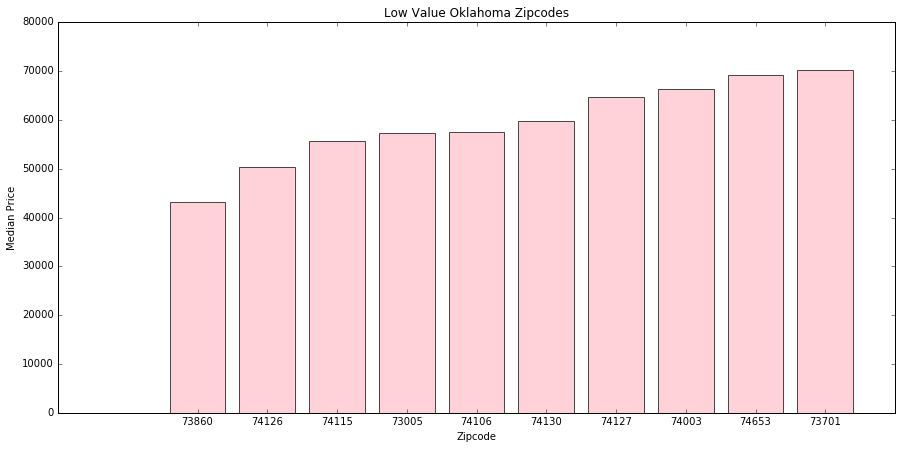

In [227]:
plt.title('Low Value Oklahoma Zipcodes')
plt.xlabel('Zipcode')
plt.ylabel('Median Price')
plt.bar(range(10), ok_chart.Zhvi.values, tick_label= ok_chart.RegionName.values[:10], 
        align='center', alpha=0.7, color='pink')
plt.show()

In [45]:
ok_info = ok_chart.City.values
print 'Cities:', ', '.join(ok_info)

Cities: Waynoka, Tulsa, Tulsa, Anadarko, Tulsa, Tulsa, Tulsa, Bartlesville, Tonkawa, Enid


In [46]:
ok_values = ok_chart.Zhvi.values
print 'Median prices:', ', '.join(map(str, ok_values))

Median prices: 43200, 50300, 55700, 57400, 57500, 59700, 64700, 66300, 69200, 70200


#### Distribution of zip codes by state

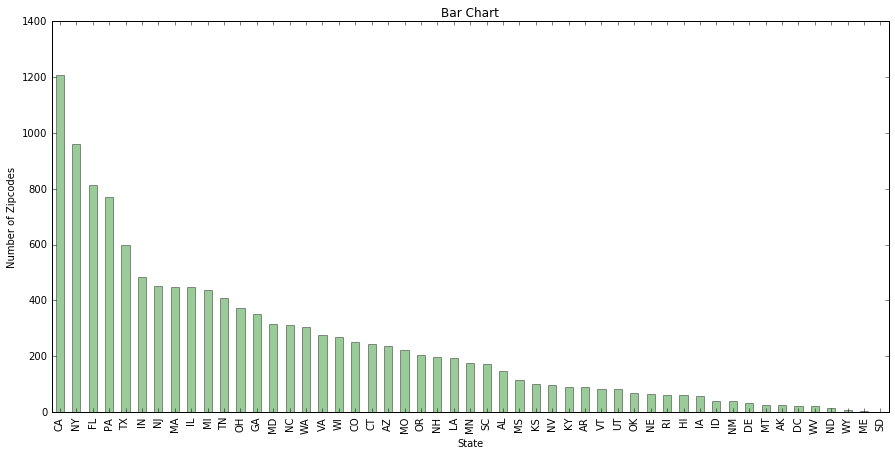

In [47]:
plt.title('Bar Chart')
plt.ylabel('Number of Zipcodes')
plt.xlabel('State')
df.State.value_counts().plot(kind='bar', alpha=0.4, color='green')
plt.show()

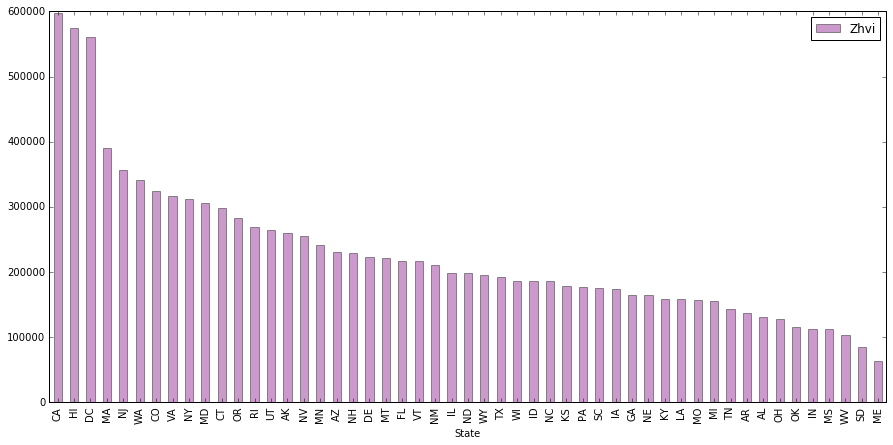

In [48]:
data = df.groupby('State').agg({'Zhvi': np.mean}).sort_values('Zhvi', ascending=False)
data.plot(kind='bar', alpha=0.4, color='purple');

#### Shows the 3 states with the lowest average median housing prices 

In [49]:
df.groupby('State')[['Zhvi']].apply(np.min).sort_values('Zhvi')[:3]

,Zhvi
State,
MI,31300
MO,33000
AL,33400


#### Shows the average, median, and standard deviation of the housing prices in each state and the number of cities

In [50]:
df.groupby('State').agg({'Zhvi': [np.mean, np.median, np.std], 'City': len})

Zhvi                         City
         mean  median            std   len
State                                     
AK     259954  243900   59860.685938    24
AL     129932  123100   73842.515840   147
AR     137511  135200   45720.549045    88
AZ     230155  206000  131036.707658   237
CA     596997  480350  489638.245066  1208
CO     324934  299900  131356.474166   252
CT     298295  237000  232528.006546   245
DC     560552  526100  216055.489676    21
DE     222909  187700  116196.811072    31
FL     216938  182600  128689.195095   815
GA     164737  137750   98766.927937   352
HI     574806  576500  223830.038101    61
IA     173442  170500   55810.188354    57
ID     185592  164200   57821.749326    41
IL     198798  169000  135180.841751   448
IN     112702  103000   45231.105080   485
KS     177647  156000   92752.559064    99
KY     158747  142600   66118.542265    91
LA     158151  148700   67866.500453   192
MA     390916  332350  215147.483634   450
MD     305962  286150  148058.645654   314
ME      63300   63300   16122.034611     2
MI     154465  140400   78039.839259   438
MN     240682  228100   91038.539261   176
MO     157115  139700   97439.336086   221
MS     112240  108300   35877.143913   115
MT     221344  230500   50574.273890    27
NC     185542  157500   93697.107635   312
ND     197507  209050   69689.116955    14
NE     164656  151800   62374.050642    66
NH     228815  221100   81454.158288   196
NJ     356443  306650  236181.401918   452
NM     210527  174900  115406.187870    40
NV     254791  231300  113988.528201    96
NY     311689  184300  336667.365710   962
OH     127478  120900   53117.508919   373
OK     115491  111700   40957.822263    68
OR     282585  260050  119516.035791   206
PA     176588  152600  102857.874424   771
RI     269236  254600  118704.182786    61
SC     174767  140500  155046.282849   174
SD      83900   83900            NaN     1
TN     143001  124450   80949.826714   408
TX     192719  155400  136135.018166   598
UT     263751  243100  107250.594815    83
VA     315939  270100  168183.299588   276
VT     216078  195800   66184.597763    84
WA     340455  298400  208927.636979   306
WI     186056  171400   67707.321225   269
WV     103565  105450   27945.101727    20
WY     194875  186350   32585.612513     8

#### Shows the five fastest appreciating zipcodes in the last 5 years

In [51]:
df.sort_values('5Year', ascending=False)[['City', 'State', 'Zhvi', '5Year']][:5]

,City,State,Zhvi,5Year
1879,Phoenix,AZ,133400,0.216850
1515,Phoenix,AZ,138400,0.214398
3915,Reno,NV,165800,0.212756
5174,Phoenix,AZ,140800,0.202494
1667,Richmond,CA,380600,0.198522


#### Shows the five fastest  year over year growing zipcodes

In [52]:
df.sort_values('YoY', ascending=False)[['City', 'State', 'Zhvi', 'YoY']][:5]

,City,State,Zhvi,YoY
6019,Middlesborough,KY,87500,0.488095
9535,Montezuma,GA,72300,0.446000
7204,Wise,VA,142400,0.445685
2615,Laguna Beach,CA,2170200,0.419173
9251,Homerville,GA,86700,0.418985


#### Shows the metropolitan areas with the highest median housing prices 

In [53]:
df.groupby('Metro').agg({'Zhvi': np.mean}).sort_values('Zhvi', ascending=False)[:10]

,Zhvi
Metro,
San Jose,1.201222e+06
San Francisco,1.004223e+06
Santa Maria-Santa Barbara,8.500882e+05
Vineyard Haven,8.077400e+05
Summit Park,7.531500e+05
Los Angeles-Long Beach-Anaheim,7.167200e+05
Salinas,6.815882e+05
Napa,6.807667e+05
Santa Cruz,6.747667e+05
